<a href="https://colab.research.google.com/github/abhinavmishragsv-analytics/Pattern-Recognition-Machine-Learning/blob/main/24AI005AbhinavAMishraAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24AI005 Abhinav A Mishra Assignment 5

Q1.Objective
To learn about classification metrics and compare logistic regression and decision tree
on the same dataset
Tasks
• define X(input) and Y(output)
• train the decision tree model
• train the logistic model
• construct a confusion matrix

• calculate the classification accurace
• calculate the Precision
• calculate the Recall
• calculate the F1 score
• calculate Area Under ROC Curve
Further fun
• Calculate precission and recall
• find the area under the curve for Roc metrics
• impliment below metrics using inbuilt librarires confusion matrix accuracy
precision recall f1 score

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
train=pd.read_csv('ozone_levels_train.csv')
test=pd.read_csv('ozone_levels_test.csv')
print(train.head())
X_train=train.drop("class",axis=1)
Y_train=train['class']
X_test=test.drop("class",axis=1)
Y_test=test['class']
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
dt_pred=dt_model.predict(X_test)
dt_prob=dt_model.predict_proba(X_test)[:,-1]
lr_model=LogisticRegression(max_iter=5000)
lr_model.fit(X_train,Y_train)
lr_pred=lr_model.predict(X_test)
lr_prob=lr_model.predict_proba(X_test)[:,-1]
dt_cm=confusion_matrix(Y_test,dt_pred)
lr_cm=confusion_matrix(Y_test,lr_pred)
print("Decision Tree Confusion Matrix:\n", dt_cm)
print("\nLogistic Regression Confusion Matrix:\n", lr_cm)
dt_acc=accuracy_score(Y_test,dt_pred)
lr_acc=accuracy_score(Y_test,lr_pred)
print("\nDecision Tree Accuracy:", dt_acc)
print("\nLogistic Regression Accuracy:", lr_acc)
dt_prec=precision_score(Y_test,dt_pred)
lr_prec=precision_score(Y_test,lr_pred)
print("\n")
print("Decision Tree Precision:", dt_prec)
print("\nLogistic Regression Precision:", lr_prec)
dt_rec=recall_score(Y_test,dt_pred)
lr_rec=recall_score(Y_test,lr_pred)
print("\n")
print("Decision Tree Recall\n",dt_rec)
print("Logistic Regression Recall\n",lr_rec)
dt_f1=f1_score(Y_test,dt_pred)
lr_f1=f1_score(Y_test,lr_pred)
print("\n")
print("Decision Tree F1 score",dt_f1)
print("Logistic Regression F1 score",lr_f1)
print("\n")
TN, FP, FN, TP = dt_cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Manual Metrics (Decision Tree)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score
dt_auc=roc_auc_score(Y_test,dt_prob)
lr_auc=roc_auc_score(Y_test,lr_prob)

   F_0  F_1  F_2  F_3  F_4  F_5  ...   F_67   F_68     F_69       F_70  F_71  class
0  2.5  3.5  4.4  4.6  4.4  3.5  ... -19.40  23.40  10315.0  -0.130416  0.00    0.0
1  1.2  0.7  0.3  0.1  0.3  0.4  ... -17.50  19.00  10210.0  15.000000  0.00    0.0
2  0.1  0.4  0.6  0.4  1.0  1.7  ... -16.90  25.90  10175.0  85.000000  0.00    0.0
3  0.6  0.9  1.0  0.6  0.7  0.7  ...  -9.55  42.15  10215.0   5.000000  0.00    0.0
4  0.1  0.4  0.3  0.1  0.1  0.0  ...  32.95  47.30  10170.0  15.000000  0.97    0.0

[5 rows x 73 columns]
Decision Tree Confusion Matrix:
 [[706  34]
 [ 18   3]]

Logistic Regression Confusion Matrix:
 [[728  12]
 [ 18   3]]

Decision Tree Accuracy: 0.9316688567674113

Logistic Regression Accuracy: 0.9605781865965834


Decision Tree Precision: 0.08108108108108109

Logistic Regression Precision: 0.2


Decision Tree Recall
 0.14285714285714285
Logistic Regression Recall
 0.14285714285714285


Decision Tree F1 score 0.10344827586206896
Logistic Regression F1 score 0.166666666

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q2 Objective
• To apply Logistic Regression and Decision Tree Algorithms on the given
imbalanced dataset. and compare the algorithms used on our dataset on the
basis of appropriately used evaluated metrics while presenting a summarized
analysis of what you find.
Tasks
• Download and load the data (csv file).
• Process the data according to guidelines given in the comments of the
respective cells.
• Split the dataset into 80% for training and rest 20% for testing.
(sklearn.model_selection.train_test_split function).
• Initialize Logistic Regression and Decision Tree Models (With parameters given in
the cell).
• Train the models on the same dataset.
• Compute the confusion matrix for both models and compare.
• Compute a classification report (Precision, Recall and F-1 score) for both models
and compare.
• Compute and plot the ROC Curve of both curves and simultaneously compute
the ROC-AUC for both models and thereby compare.
• Summarize your findings and give reasoning for your results (comparing task_1
and task_2).
Further Fun
• Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-
10, 95-5 etc. and observe accuracies on both X_train and X_test.
• Shuffle training samples with different random seed values in the train_test_split
function. Check the model error for the testing data for each setup.
• Explore ways to deal with imbalanced dataset. Use different methods (such as
eliminating outliers and such) to experiment with the given dataset.

   Age  Experience  Income  ...  CD Account  Online  Personal Loan
0   25           1      49  ...           0       0              0
1   45          19      34  ...           0       0              0
2   39          15      11  ...           0       0              0
3   35           9     100  ...           0       0              0
4   35           8      45  ...           0       0              0

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            50

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix
[[889  15]
 [ 33  63]]

Decision Tree Confusion Matrix
[[894  10]
 [  7  89]]
Logistic Regression Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       904
           1       0.81      0.66      0.72        96

    accuracy                           0.95      1000
   macro avg       0.89      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Decision Tree Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.90      0.93      0.91        96

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000



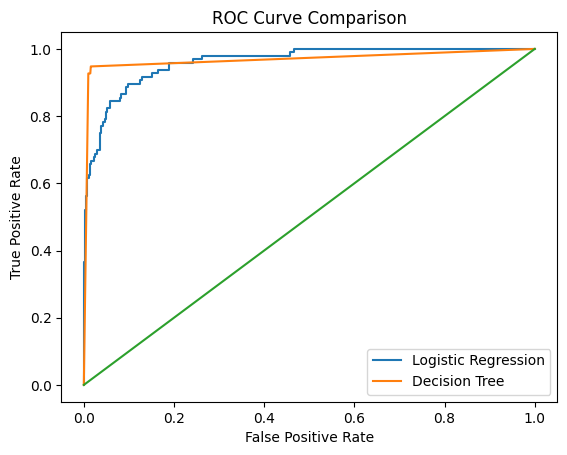

Logistic Regression AUC: 0.9616864859882006
Decision Tree AUC: 0.9686002028023598


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test size: 0.4, Accuracy: 0.956


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Seed 99, Accuracy: 0.954


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test size: 0.3, Accuracy: 0.8893333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Seed 99, Accuracy: 0.888


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test size: 0.2, Accuracy: 0.894


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Seed 99, Accuracy: 0.888


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test size: 0.1, Accuracy: 0.906


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Seed 99, Accuracy: 0.888


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test size: 0.05, Accuracy: 0.9
Seed 99, Accuracy: 0.888


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
df=pd.read_csv('personal_loan.csv')
print(df.head())
print(df.info())
print(df["Personal Loan"].value_counts())
print("Loan Accepted by",df["Personal Loan"].value_counts()[1],"customers")
X=df.drop('Personal Loan',axis=1)
Y=df['Personal Loan']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train,Y_train)
dt=DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

lr_prob = lr.predict_proba(X_test)[:,1]
dt_prob = dt.predict_proba(X_test)[:,1]
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(Y_test, lr_pred))

print("\nDecision Tree Confusion Matrix")
print(confusion_matrix(Y_test, dt_pred))

print("Logistic Regression Report")
print(classification_report(Y_test, lr_pred))

print("Decision Tree Report")
print(classification_report(Y_test, dt_pred))

fpr_lr, tpr_lr, _ = roc_curve(Y_test, lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_prob)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1], [0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("Logistic Regression AUC:", roc_auc_score(Y_test, lr_prob))
print("Decision Tree AUC:", roc_auc_score(Y_test, dt_prob))

for split in [0.4, 0.3, 0.2, 0.1, 0.05]:
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y,
        test_size=split,
        random_state=42,
        stratify=Y
    )

    lr.fit(X_train, Y_train)
    print(f"Test size: {split}, Accuracy:", accuracy_score(Y_test, lr.predict(X_test)))

    for seed in [0, 10, 42, 99]:
        X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y,
        test_size=0.2,
        random_state=seed,
        stratify=Y
    )

    lr.fit(X_train, Y_train)
    print(f"Seed {seed}, Accuracy:", accuracy_score(Y_test, lr.predict(X_test)))

    lr = LogisticRegression(class_weight="balanced", max_iter=1000)
dt = DecisionTreeClassifier(class_weight="balanced")